## Create a new raster with the checkerboard pattern

In atmospheric modeling, a heterogenous surface raster represented by a checkerboard pattern can be used as an initial condition for idealized model simulations.

In [8]:
import json    
from arcpy.sa import RasterInfo, Raster, RasterCellIterator
from arcpy.ia import Render

In [17]:
# Create an empty RasterInfo object  
myRasterInfo = RasterInfo()  
  
# Load raster info from a Python dictionary  
myRasterInfoData = {  
  'bandCount': 1,  
  'extent': {  
    'xmin': -107.0,  
    'ymin': 38.0,  
    'xmax': -104.0,  
    'ymax': 40.0,  
    'spatialReference': {'wkid': 4326},  
  },  
  'pixelSizeX': 0.01,  
  'pixelSizeY': 0.01,  
  'pixelType': 'U8',  
}  

In [18]:
# Convert myRasterInfoData to a JSON string and load into myRasterInfo  
myRasterInfo.fromJSONString(json.dumps(myRasterInfoData))  
  
# Create a new Raster object based on myRasterInfo  
myRaster = Raster(myRasterInfo)  

In [19]:
for (r, c) in myRaster:   
    # Checkerboard with 10 pixels width  
    if r % 20 < 10 and c % 20 < 10 or r % 20 >= 10 and c % 20 >= 10:  
        myRaster[r, c] = 1  
    else:  
        myRaster[r, c] = 0
myRaster.save(r'C:\DevSummit20\PythonCustomAnalysis\Output\checkerboard.tif')  

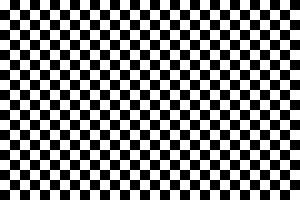

In [20]:
Render(myRaster, colormap="Black to White")

## Count the number of neighboring cells that have a different value from the center cell

Stathakis & Tsilimigkas (2015) proposed several metrics to calculate the compactness of cities using land use adjacency information. To derive the compactness metric, one of the pre-processing steps is to iterate through the land use data and count the number of neighboring cells that have a value different to the center cell. This focal operation process is illustrated in the following figure

![image_file](https://www.esri.com/arcgis-blog/wp-content/uploads/2020/01/f2-e1578962025582.png)

In [5]:
from math import isnan     

# Read a landuse dataset
landu = Raster(r"C:\DevSummit20\PythonCustomAnalysis\Input\landu.tif")

In [6]:
# Create a temporary output raster based on the raster info of landuse    
output = Raster(landu.getRasterInfo())

In [9]:
with RasterCellIterator({'rasters':[landu, output]}) as rci:    
    for i,j in rci:    
        count = 0     
        # Assign NoData value to the output if the input is NoData    
        if isnan(landu[i,j]):    
            output[i,j] = math.nan    
            continue    
        # Create a moving window    
        for x in [-1,0,1]:    
            for y in [-1,0,1]:    
                # Count the number of adjacent cells with a different value      
                if not isnan(landu[i+x,j+y]) and landu[i+x,j+y] != landu[i,j]:    
                    count+=1    
        output[i,j] = count     

In [10]:
output.save(r"C:\DevSummit20\PythonCustomAnalysis\Output\landu_diff_count.tif") 